# Визуализация прецедента

Содержание:
1. Чтение прецедента из CSV
2. Загрузка задачи
3. Загрузка трассы
4. Визуализация задачи и трассы
5. Загрузка и визуализация рецептивного поля
6. Визуализация прецедента

Задаем номер прецедента. Загружаем CSV-файл. Проверяем данные.

In [1]:
import pandas

ID = 482
BASE_DIR = 'C:/TORNADO/'

precedents = pandas.read_csv(BASE_DIR + 'lp_dataset_im.csv', delimiter=';', header=None, index_col=0)
precedent = precedents.iloc[ID-1]
print(precedent)
problem_id = int(precedent[1] - 1)
trace_id = int(precedent[2] - 1)

1      100.000000
2        3.000000
3        3.726780
4        2.981424
5        2.236068
          ...    
122      2.580770
123      2.878913
124      0.000000
125      0.707237
126     -0.706977
Name: 482, Length: 126, dtype: float64


Читаем из прецедента номер задачи. Открываем пакет задач и читаем нужную. Сохраняем ее во временный файл.

In [2]:
with open(BASE_DIR + 'lpp.txt') as lpp:
    problems_number = int(lpp.readline())
    if problem_id < problems_number:
        for i in range(int(problem_id)):
            inequalities = int(lpp.readline().split('\t')[0])
            for j in range(inequalities):
                lpp.readline()
            lpp.readline()
    else:
        print('Problem_ID is greater than number of problems!')
                
    with open('lpp.txt.temp', 'w') as fout:
        line = lpp.readline()
        fout.write(line)
        inequalities = int(line.split('\t')[0])
        for j in range(inequalities):
            fout.write(lpp.readline())
        fout.write(lpp.readline())

Открываем пакет трасс и долистываем до нужной. Читаем ее.

In [3]:
import numpy as np
traces_skipped = 0
with open(BASE_DIR + 'lp_dataset_tr.mtx.pack') as tr:
    traces_number = int(tr.readline())
    if problem_id < traces_number:
        for i in range(int(problem_id)):
            trace_len = int(tr.readline().split('\t')[0])
            for j in range(trace_len):
                tr.readline()
            traces_skipped += trace_len
    else:
        print('Problem_ID is greater than number of traces in the package!')
    
    data = tr.readline().split('\t')
    print(data)
    rows = int(data[0].strip())
    cols = int(data[1].strip())

    data = []
    for i in range(rows):
        data.append([float(x) for x in tr.readline().strip().split('\t')])

    data = np.array(data)
    print(rows,cols)
    print(data)
    
    point = data[trace_id]
    print(point)

['4', '3\n']
4 3
[[  0.           0.         200.00000001]
 [180.00266667 120.00066667 199.99666668]
 [200.00000001 121.77398337 178.21601906]
 [200.         148.83331696 151.16664469]]
[200.00000001 121.77398337 178.21601906]


Отрисуем теперь задачу и трассу.

Saved to ./7.png
Saved to ./8.png
Saved to ./9.png
Saved to ./10.png
Saved to ./11.png
Saved to ./12.png
Saved to ./13.png


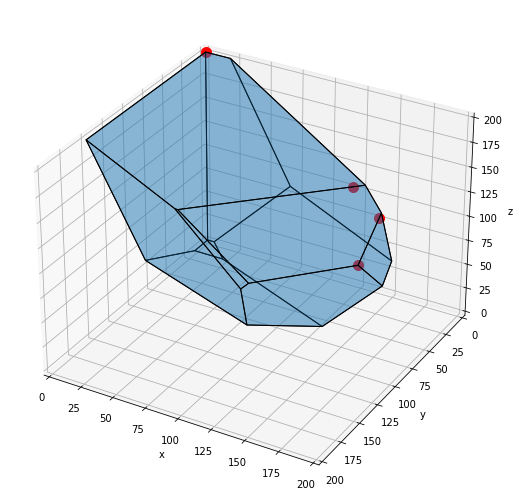

In [4]:
from Problem import Problem
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3

problem = Problem('lpp.txt.temp')
problem.savePlotSequence('./')

fig = plt.figure(figsize=(18,9))
ax2 = fig.add_subplot(111, projection='3d')
problem.addFacetsToSubplot(ax2)
problem.adjustSubplot(ax2)

ax2.scatter(data[:,0], data[:,1], data[:,2], s=100, color="red", alpha=1., depthshade=False)

plt.savefig('trace.png')
plt.show(fig)
plt.close()

Откроем пакет сетчаток и пролистаем до нужной. Прочитаем сетчатку. Визуализируем.

In [5]:
with open(BASE_DIR + 'lp_dataset_ret.mtx.pack') as ret:
    problems_number = int(ret.readline())
    if problem_id < problems_number:
        for i in range(int(problem_id)):
            retina_len = int(ret.readline().split('\t')[0])
            for j in range(retina_len):
                ret.readline()
    else:
        print('Problem_ID is greater than number of traces in the package!')
    
    retina = ret.readline().split('\t')
    print(retina)
    rows = int(retina[0].strip())
    cols = int(retina[1].strip())

    retina = []
    for i in range(rows):
        retina.append([float(x) for x in ret.readline().strip().split('\t')])

    retina = np.array(retina)
    print(rows,cols)
    print(retina)

['121', '3\n']
121 3
[[ 3.83269527e+00 -1.34961786e+00  1.93036611e+02]
 [ 3.23508096e+00 -6.32480691e-01  1.93395180e+02]
 [ 2.63746666e+00  8.46564748e-02  1.93753748e+02]
 [ 2.03985235e+00  8.01793640e-01  1.94112317e+02]
 [ 1.44223805e+00  1.51893081e+00  1.94470885e+02]
 [ 8.44623744e-01  2.23606797e+00  1.94829454e+02]
 [ 2.47009440e-01  2.95320514e+00  1.95188023e+02]
 [-3.50604865e-01  3.67034230e+00  1.95546591e+02]
 [-9.48219170e-01  4.38747947e+00  1.95905160e+02]
 [-1.54583347e+00  5.10461663e+00  1.96263728e+02]
 [-2.14344778e+00  5.82175380e+00  1.96622297e+02]
 [ 3.83269527e+00 -1.79683145e+00  1.93931038e+02]
 [ 3.23508096e+00 -1.07969429e+00  1.94289607e+02]
 [ 2.63746666e+00 -3.62557121e-01  1.94648175e+02]
 [ 2.03985235e+00  3.54580045e-01  1.95006744e+02]
 [ 1.44223805e+00  1.07171721e+00  1.95365313e+02]
 [ 8.44623744e-01  1.78885438e+00  1.95723881e+02]
 [ 2.47009440e-01  2.50599154e+00  1.96082450e+02]
 [-3.50604865e-01  3.22312871e+00  1.96441018e+02]
 [-9.48219

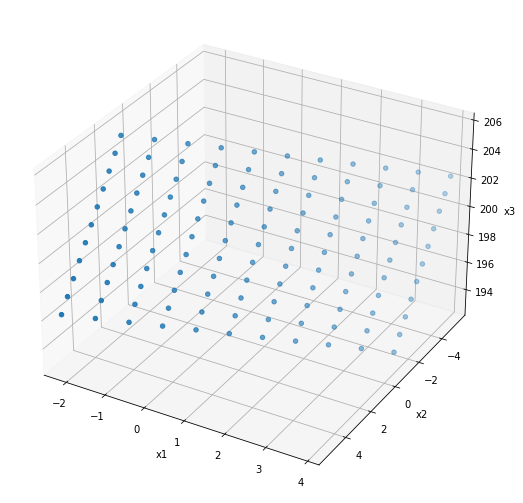

In [6]:
import matplotlib.pyplot as plt

plt.ioff()
fig=plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
#ax.set_autoscale_on(False)

ax.scatter(retina[:,0], retina[:,1], retina[:,2], marker='o')

ax.set_xlabel('x1')
#ax.set_xlim(-10,10)
ax.set_ylabel('x2')
ax.set_ylim(max(retina[:,1]), min(retina[:,1]))
ax.set_zlabel('x3')
#ax.set_zlim(-10,10)
#ax.axis('off')
plt.show()
plt.close(fig)

In [7]:
image = np.array(precedent[2:123].astype(float))
print(image)

[ 3.7267800e+00  2.9814240e+00  2.2360680e+00  1.4907120e+00
  7.4535600e-01  0.0000000e+00 -7.4535600e-01 -8.0438100e-01
 -5.0623900e-01 -2.0809600e-01  9.0046000e-02  3.7267800e+00
  2.9814240e+00  2.2360680e+00  1.4907120e+00  7.4535600e-01
  0.0000000e+00 -7.4535600e-01 -5.2549500e-01 -2.2735200e-01
  7.0790000e-02  3.6893300e-01  3.7267800e+00  2.9814240e+00
  2.2360680e+00  1.4907120e+00  7.4535600e-01  0.0000000e+00
 -5.4475000e-01 -2.4660800e-01  5.1534000e-02  3.4967700e-01
  6.4781900e-01  3.7267800e+00  2.9814240e+00  2.2360680e+00
  1.4907120e+00  7.4535600e-01  0.0000000e+00 -2.6586400e-01
  3.2279000e-02  3.3042100e-01  6.2856400e-01  9.2670600e-01
  3.7267800e+00  2.9814240e+00  2.2360680e+00  1.4907120e+00
  7.4535600e-01  0.0000000e+00  1.3023000e-02  3.1116500e-01
  6.0930800e-01  9.0745000e-01  1.2055930e+00  1.1201275e+01
  2.9814240e+00  2.2360680e+00  1.4907120e+00  7.4535600e-01
  0.0000000e+00  2.9191000e-01  5.9005200e-01  8.8819500e-01
  1.1863370e+00  1.48447

Отрисуем образ.

[0.80178373 0.53452248 0.26726124]
18.87330207729839
-17.274761607214522
-13.09967988926682
196.85120795015865


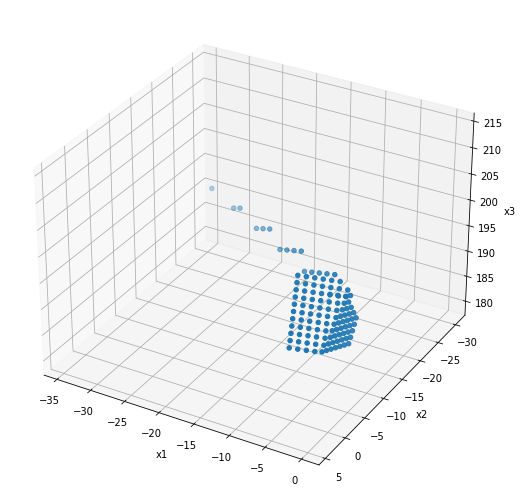

In [8]:
import matplotlib.pyplot as plt
print(problem.c)
result = retina - problem.c * image[:,np.newaxis]
'''
result = []
for s in shadow:
    if s[0] > 0. or s[1] > 0. or s[2] > 0. :
        result.append(s)

result = np.array(result)
''' 
plt.ioff()
fig=plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
#ax.set_autoscale_on(False)

#ax.scatter(shadow[:,0], shadow[:,1], shadow[:,2], marker='o')
ax.scatter(result[:,0], result[:,1], result[:,2], marker='o')
#ax.scatter(retina[:,0], retina[:,1], retina[:,2], marker='o', color='green')

radius = max((max(result[:,0])-min(result[:,0]),max(result[:,1])-min(result[:,1]),max(result[:,2])-min(result[:,2])))/2
center_x = (max(result[:,0])-min(result[:,0]))/2 + min(result[:,0])
center_y = (max(result[:,1])-min(result[:,1]))/2 + min(result[:,1])
center_z = (max(result[:,2])-min(result[:,2]))/2 + min(result[:,2])
print(radius)
print(center_x)
print(center_y)
print(center_z)

ax.set_xlabel('x1')
ax.set_xlim(center_x-radius,center_x+radius)
ax.set_ylabel('x2')
ax.set_ylim(center_y+radius,center_y-radius)
ax.set_zlabel('x3')
ax.set_zlim(center_z-radius,center_z+radius)
#ax.axis('off')
plt.show()
plt.close(fig)

Попробуем нарисовать общую картинку.

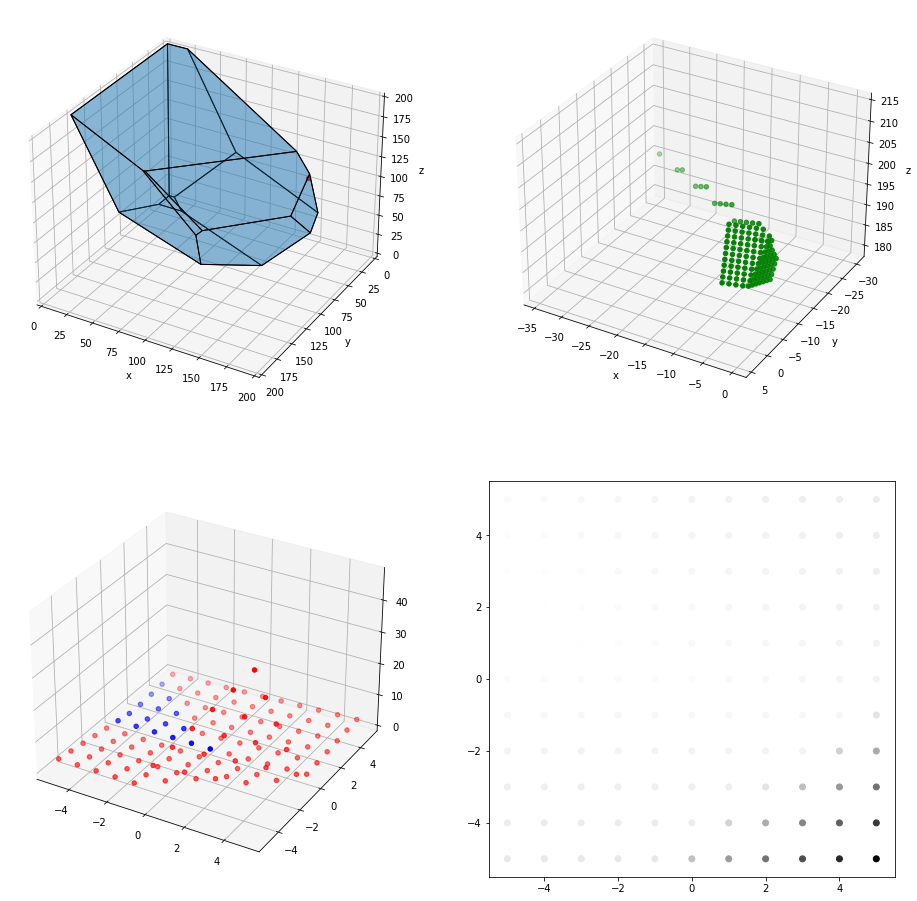

In [9]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
from mpl_toolkits.mplot3d import Axes3D

#plt.ioff()
fig = plt.figure(figsize=(16,16))
facets = problem.facets()
pc = a3.art3d.Poly3DCollection(facets, edgecolor="k", alpha=0.3)
#limits = self.axis_lims()
#vertex = self.vertex.point

ax_left = fig.add_subplot(221, projection='3d')
ax_left.add_collection3d(pc)
ax_left.scatter(point[0], point[1], point[2], color="red")

ax_left.set_xlabel('x')
ax_left.set_xlim([0,200])
ax_left.set_ylabel('y')
ax_left.set_ylim([200,0])
ax_left.set_zlabel('z')
ax_left.set_zlim([0,200])

ax_right = fig.add_subplot(222, projection='3d')
ax_right.scatter(result[:,0], result[:,1], result[:,2], color="green")
#ax_right.scatter(retina[:,0], retina[:,1], retina[:,2], color="blue")
#ax_right.scatter(projectedAnswerPoint[0], projectedAnswerPoint[1], projectedAnswerPoint[2], color="pink")

#ax_right.quiver(
#    point[0], 
#    point[1], 
#    point[2], 
#    projectedAnswerVector[0], 
#    projectedAnswerVector[1], 
#    projectedAnswerVector[2], 
#    arrow_length_ratio=0.05, 
#    length=2.0*self.retina.r, 
#    color="red"
#)

ax_right.set_xlabel('x')
ax_right.set_xlim(center_x-radius,center_x+radius)
ax_right.set_ylabel('y')
ax_right.set_ylim(center_y+radius,center_y-radius)
ax_right.set_zlabel('z')
ax_right.set_zlim(center_z-radius,center_z+radius)

base = np.array(np.meshgrid(np.arange(-5,6), np.arange(-5,6))).T.reshape(-1,2)
base = np.hstack((base,image[:,np.newaxis]))
ax_base = fig.add_subplot(223, projection='3d')
negative = base[base[:,-1] <= 0.]
positive = base[base[:,-1] > 0.]
ax_base.scatter(negative[:,0], negative[:,1], negative[:,2], color="blue")
ax_base.scatter(positive[:,0], positive[:,1], positive[:,2], color="red")
ax_base.set_zlim(min(negative[:,-1]), max(positive[:,-1]))

ax_grey = fig.add_subplot(224)
min_val = min(image)
for i in range(image.size):
    if image[i] > 90000.: image[i] = min_val
max_val = max(image)
norm_val = (max_val - image) / (max_val - min_val)
colors = [(color, color, color) for color in norm_val]
ax_grey.scatter(base[:,0], base[:,1], c=colors)
#ax_grey.scatter(back_test[0], back_test[1], color="green")

'''
ax_grey.quiver(
    self.base_retina.zero_point[0], 
    self.base_retina.zero_point[1],
    self.zeroVector2D[0], 
    self.zeroVector2D[1],
    scale = 2.,
    color="black"
)
#print(self.projectedAnswerVector2D)
ax_grey.quiver(
    self.base_retina.zero_point[0], 
    self.base_retina.zero_point[1],
    self.projectedAnswerVector2D[0], 
    self.projectedAnswerVector2D[1],
    scale = 2.,
    color="red"
)
ax_grey.set_title('2D angle = {0}'.format(self.angle2D))
#ax_grey.xlabel('x')
#ax_grey.ylabel('y')

if not filename:
    plt.show()
else:
    plt.savefig(filename)
    print('Saved to ' + filename)
plt.close(fig)
'''
plt.show(fig)